### Webcam audio recorder

Records user audio input through the user's webcam and visualizes the audio's wave form and spectrogram. To use, run cells 1 and 2, then use the recording widget. When done recording, run cells 3 and 4.

1. Import libraries
2. Recording widget
3. Convert audio format w/ ffmpeg and post audio widget
4. Plot visualizations

Dependent on [librosa](https://librosa.org/) library as well as [ffmpeg](https://ffmpeg.org/). Instructions on installing ffmpeg can be found [here](https://github.com/jiaaro/pydub#getting-ffmpeg-set-up).

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from ipywebrtc import AudioStream, CameraStream, AudioRecorder
from ipywidgets import Audio

In [2]:
# Webcam audio recorder
# Click record button to record audio. Your browser will ask for microphone permissions.
# When done, click record again, then run the rest of the notebook.
camera = CameraStream(constraints=
                      {'facing_mode': 'user',
                       'audio': True,
                       'video': False })
recorder = AudioRecorder(stream=camera)
recorder

AudioRecorder(audio=Audio(value=b'', format='webm'), stream=CameraStream(constraints={'facing_mode': 'user', '…

In [3]:
# Save recording and convert from .webm to .wav
recorder.save('library/record.webm')
!ffmpeg -i "library/record.webm" -vn -y "library/record.wav"

# Audio ouput
audio = Audio.from_file('record.wav')
audio

ffmpeg version 2021-02-07-git-a52b9464e4-essentials_build-www.gyan.dev Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 10.2.0 (Rev6, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-lzma --enable-zlib --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-sdl2 --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxvid --enable-libaom --enable-libopenjpeg --enable-libvpx --enable-libass --enable-libfreetype --enable-libfribidi --enable-libvidstab --enable-libvmaf --enable-libzimg --enable-amf --enable-cuda-llvm --enable-cuvid --enable-ffnvcodec --enable-nvdec --enable-nvenc --enable-d3d11va --enable-dxva2 --enable-libmfx --enable-libgme --enable-libopenmpt --enable-libopencore-amrwb --enable-libmp3lame --enable-libtheora --enable-libvo-amrwbenc --enable-libgsm --enable-libope

Audio(value=b'RIFFf\xf4\x15\x00WAVEfmt \x10\x00\x00\x00\x01\x00\x02\x00\x80\xbb\x00\x00\x00\xee\x02\x00\x04\x0…

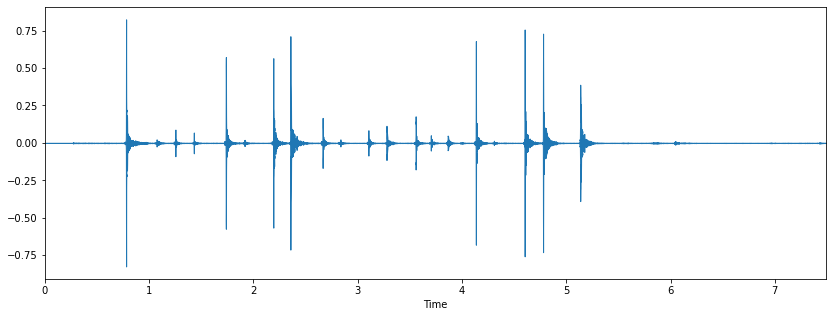

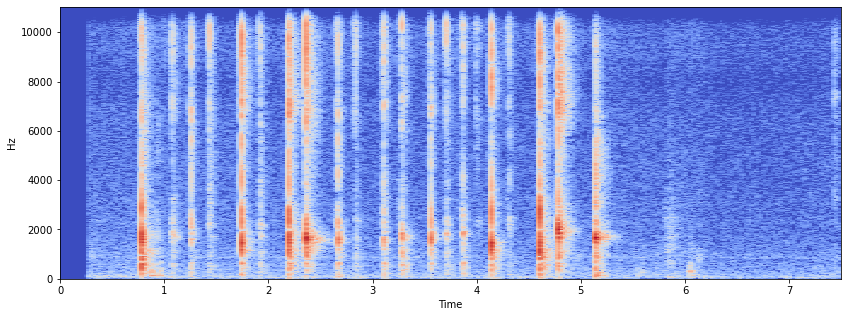

In [4]:
# Wave form
x, sr = librosa.load('record.wav')
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

# Spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')